<a href="https://colab.research.google.com/github/amannain122/projects/blob/main/Clustering_using_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering


Clustering is a type of unsupervised machine learning technique used to group similar data points into clusters or groups. Unlike supervised learning, where the model is trained on labeled data, clustering algorithms work with unlabeled data and aim to find unseen relationship within the data.

- The primary objective of clustering is to maximize the similarity within clusters and minimize the similarity between different clusters.
- Clustering algorithms typically use a similarity or distance measure (such as Euclidean distance, cosine similarity, etc.) to determine how similar or dissimilar data points are from each other.
- Clusters are formed based on the principle that data points within the same cluster are more similar to each other compared to those in other clusters. The structure of clusters can vary widely depending on the algorithm and the nature of the data.

**Clustering is used for:**
- Customer Segmentation
- Image Segmentation
- Anomaly Detection
- Document Clustering

**Clustering uses different methods and algorithms:**
- Partitioning Methods:
 - Divide the data into non-overlapping subsets (clusters). Examples include K-means.
- Hierarchical Methods:
 - Create a tree of clusters (dendrogram). Examples include Agglomerative and Divisive clustering.
- Density-Based Methods:
 - Form clusters based on the density of data points in the region. Examples include DBSCAN and OPTICS.

## k-mean algorithm


K-means is one of the most popular clustering algorithms. It is a partitioning method that divides a dataset into k clusters by minimizing the variance within each cluster. It iteratively assigns data points to clusters based on the nearest mean and updates the cluster centroids until convergence.

K-means aims to minimize the total within-cluster variation, which is measured by the sum of squared distances between data points and their respective centroid. It's computationally efficient and works well for datasets where clusters are well-separated and roughly spherical.

However, it has limitations:

- It requires the number of clusters (k) to be specified in advance.
- It can converge to local optima depending on the initial centroids.
- It assumes clusters are spherical and of similar size.

## steps for k-means
The typical steps for the K-means clustering algorithm are as follows:

- Centroid Intialization: Choose K initial cluster centroids randomly from the data points.

- Assign Data Points to Clusters: For each data point, calculate the distance to each centroid. Assign each data point to the nearest centroid, forming
K clusters.

- Update Centroids: Recalculate the centroid of each cluster as the mean of all data points assigned to that cluster.

- Iterrate and update steps until the centroids no longer change significantly.

- For new data: It assigns to the nearest centroid based on the final clusters

### Import libraries, modules and/or methods

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### Loading and plotting the data

In [ ]:
df = pd.read_csv('CountryClusters.csv')
df

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [ ]:
df.shape

(6, 4)

<ipython-input-4-70cf5f4e59ce>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Language', y='Count', data=language_counts, palette='viridis')


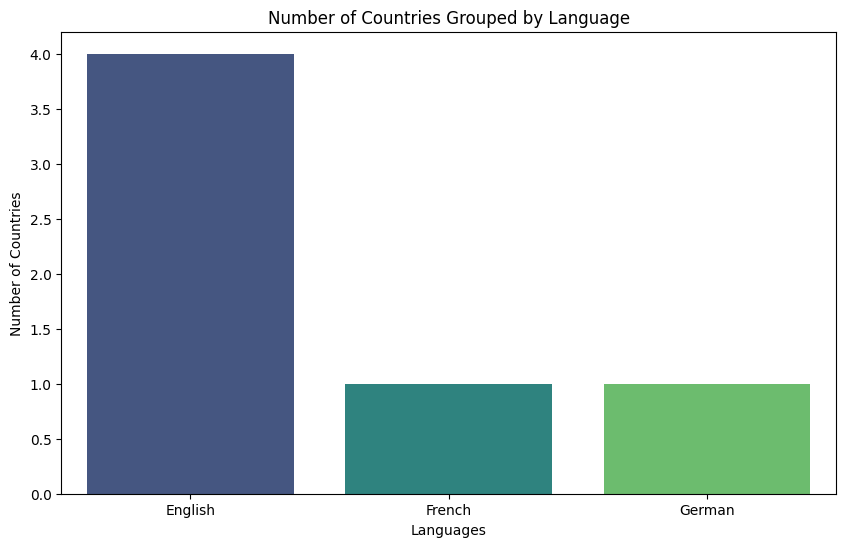

In [ ]:
language_counts = df.groupby('Language').size().reset_index(name='Count')

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Language', y='Count', data=language_counts, palette='viridis')
plt.xlabel('Languages')
plt.ylabel('Number of Countries')
plt.title('Number of Countries Grouped by Language')
plt.show()

### Select the latitude and longitude as the features

In [ ]:
features = df[['Latitude', 'Longitude']]

### Perform k-mean clustering with k = 3

In [ ]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=3,n_init=10, random_state=42)
clusters = kmeans.fit_predict(features)

df['Cluster'] = clusters

### Plot the clusters

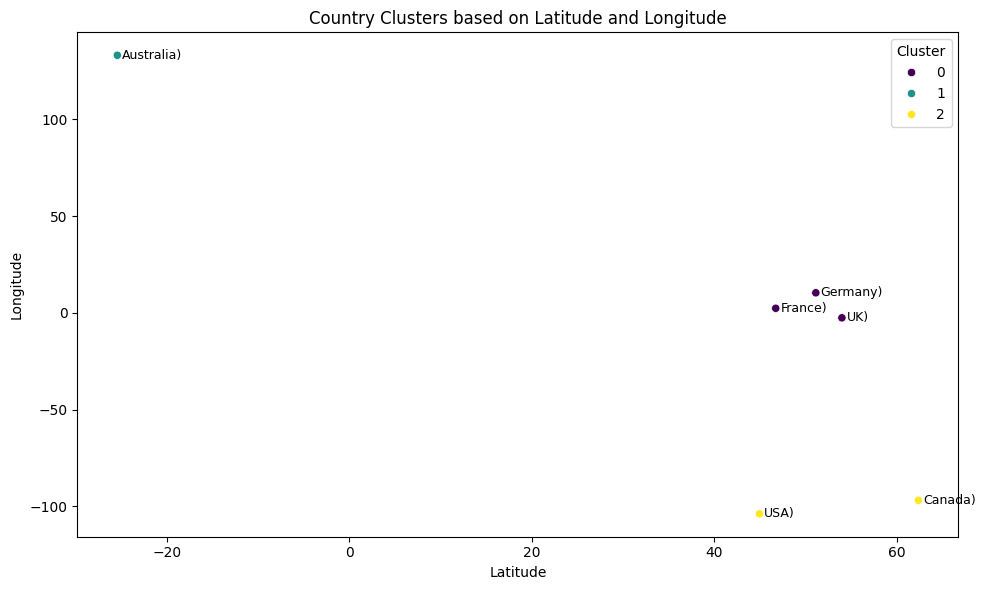

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Latitude', y='Longitude', data=df, hue='Cluster', palette='viridis', marker='o')

# Annotate each point with country and language
for _, row in df.iterrows():
    plt.text(row['Latitude'] + 0.5, row['Longitude'], f'{row["Country"]})', fontsize=9, verticalalignment='center')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Country Clusters based on Latitude and Longitude')

# Show plot
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

### Take use of WCSS (Within-Cluster-Sum-of-Squares) to find the best number of k to be selected.

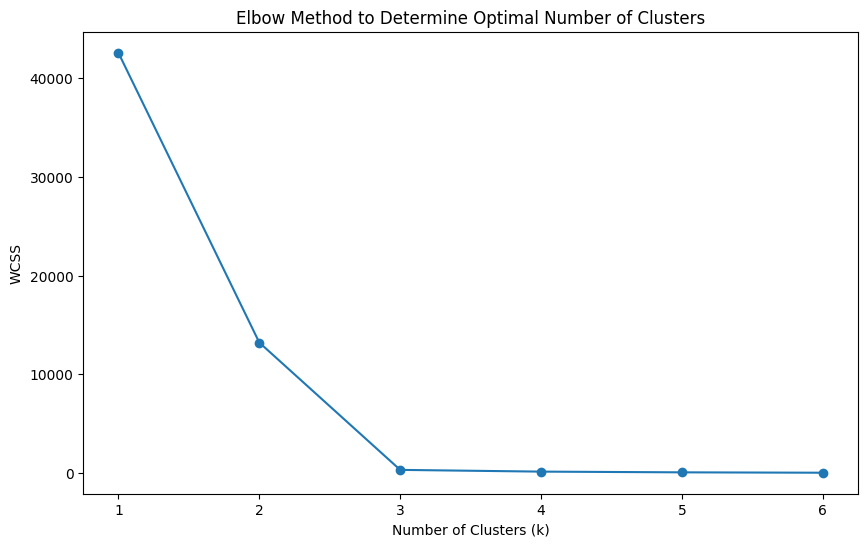

In [ ]:
# Calculate WCSS for different values of k
wcss = []
for k in range(1, len(features) + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)


# Plot the WCSS
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(features) + 1), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()

### Conclusion

The WCSS declines once the number of cluster k>2 and follow a constant pattern.